# Forecasting Interest Rate Hikes by the U.S. Federal Reserve

<img src="images/federal-reserve.png"/>

The federal funds rate is the key interest rate that the U.S. Federal Reserve uses to influence economic growth. The Federal Open Market Committee meets regularly to decide whether to increase, decrease, or maintain the target interest rate. Their choice has important ramifications that cascade through the economy, so the announcement of the interest rates is eagerly awaited each month.

In this problem, we will use analytics to try to predict when the Federal Reserve will raise interest rates. We will look at monthly economic and political data dating back to the mid-1960's. In this analysis, the dependent variable will be the binary outcome variable RaisedFedFunds, which takes value 1 if the federal funds rate was increased that month and 0 if it was lowered or stayed the same. For each month, the file federalFundsRate.csv contains the following independent variables:

    Date: The date the change was announced.

    Chairman: The name of the Federal Reserve Chairman at the time the change was announced.

    PreviousRate: The federal funds rate in the prior month.
    
    Streak: The current streak of raising or not raising the rate, e.g. +8 indicates the rate has been increased 8 months in a row, 

    whereas -3 indicates the rate has been lowered or stayed the same for 3 months in a row.

    GDP: The U.S. Gross Domestic Product, in Billions of Chained 2009 US Dollars.

    Unemployment: The unemployment rate in the U.S.

    CPI: The Consumer Price Index, an indicator of inflation, in the U.S.

    HomeownershipRate: The rate of homeownership in the U.S.

    DebtAsPctGDP: The U.S. national debt as a percentage of GDP

    DemocraticPres: Whether the sitting U.S. President is a Democrat (DemocraticPres=1) or a Republican (DemocraticPres=0)

    MonthsUntilElection: The number of remaining months until the next U.S. presidential election.

### Problem 1 - Loading the Data
Use the read.csv function to load the contents of *federalFundsRate.csv* into a data frame called *fedFunds*, using *stringsAsFactors=FALSE*. 

In [1]:
# Load the Dataset

fedFunds = read.csv("data/federalFundsRate.csv", stringsAsFactors=FALSE)

head(fedFunds)

,Date,Chairman,PreviousRate,Streak,GDP,Unemployment,CPI,HomeownershipRate,DebtAsPctGDP,DemocraticPres,MonthsUntilElection,RaisedFedFunds
,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1966-02-01,"Martin, William M.",4.42,4,4201.891,4.0,31.88,63.5,40.26076,1,33,1
2,1966-03-01,"Martin, William M.",4.60,5,4201.891,3.8,32.08,63.5,4201.89100,1,32,1
3,1966-04-01,"Martin, William M.",4.65,6,4201.891,3.8,32.18,63.5,4201.89100,1,31,1
4,1966-05-01,"Martin, William M.",4.67,7,4219.097,3.8,32.28,63.2,39.15969,1,30,1
5,1966-06-01,"Martin, William M.",4.90,8,4219.097,3.9,32.35,63.2,4219.09700,1,29,1
6,1966-07-01,"Martin, William M.",5.17,9,4219.097,3.8,32.38,63.2,4219.09700,1,28,1


In [2]:
str(fedFunds)

'data.frame':	585 obs. of  12 variables:
 $ Date               : chr  "1966-02-01" "1966-03-01" "1966-04-01" "1966-05-01" ...
 $ Chairman           : chr  "Martin, William M." "Martin, William M." "Martin, William M." "Martin, William M." ...
 $ PreviousRate       : num  4.42 4.6 4.65 4.67 4.9 5.17 5.3 5.53 5.4 5.53 ...
 $ Streak             : int  4 5 6 7 8 9 10 11 -1 1 ...
 $ GDP                : num  4202 4202 4202 4219 4219 ...
 $ Unemployment       : num  4 3.8 3.8 3.8 3.9 3.8 3.8 3.8 3.7 3.7 ...
 $ CPI                : num  31.9 32.1 32.2 32.3 32.4 ...
 $ HomeownershipRate  : num  63.5 63.5 63.5 63.2 63.2 63.2 63.3 63.3 63.3 63.8 ...
 $ DebtAsPctGDP       : num  40.3 4201.9 4201.9 39.2 4219.1 ...
 $ DemocraticPres     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ MonthsUntilElection: int  33 32 31 30 29 28 27 26 25 24 ...
 $ RaisedFedFunds     : int  1 1 1 1 1 1 1 0 1 1 ...


In [3]:
summary(fedFunds)

     Date             Chairman          PreviousRate        Streak       
 Length:585         Length:585         Min.   : 0.070   Min.   :-16.000  
 Class :character   Class :character   1st Qu.: 3.290   1st Qu.: -2.000  
 Mode  :character   Mode  :character   Median : 5.390   Median :  1.000  
                                       Mean   : 5.651   Mean   :  1.094  
                                       3rd Qu.: 7.880   3rd Qu.:  3.000  
                                       Max.   :19.100   Max.   : 27.000  
      GDP         Unemployment         CPI         HomeownershipRate
 Min.   : 4202   Min.   : 3.400   Min.   : 31.88   Min.   :63.20    
 1st Qu.: 6039   1st Qu.: 5.000   1st Qu.: 63.40   1st Qu.:64.20    
 Median : 8907   Median : 5.900   Median :129.10   Median :64.80    
 Mean   : 9450   Mean   : 6.181   Mean   :127.71   Mean   :65.41    
 3rd Qu.:12956   3rd Qu.: 7.300   3rd Qu.:180.00   3rd Qu.:66.50    
 Max.   :16206   Max.   :10.800   Max.   :237.63   Max.   :69.20    

**What proportion of months did the Fed raise the interest rate?**

In [4]:
prop.table(table(fedFunds$RaisedFedFunds))


        0         1 
0.4974359 0.5025641 

Answer: 50.26%

### Problem 2 - The Longest-Serving Fed Chair
**Which Federal Reserve Chair has presided over the most interest rate decisions?**

In [5]:
table(fedFunds$Chairman)


     Bernanke, Ben      Burns, Arthur    Greenspan, Alan Martin, William M. 
                96                 96                221                 48 
Miller, G. William                N/A      Volcker, Paul      Yellen, Janet 
                17                  2                 96                  9 

Answer: Alan Greenspan.

### Problem 3 - Converting Variables to Factors
Convert the following variables to factors using the as.factor function:

    Chairman

    DemocraticPres

    RaisedFedFunds

In [6]:
# Convert the following variables to factors

fedFunds$Chairman = as.factor(fedFunds$Chairman)

fedFunds$DemocraticPres = as.factor(fedFunds$DemocraticPres)

fedFunds$RaisedFedFunds = as.factor(fedFunds$RaisedFedFunds)

In [7]:
head(fedFunds)

,Date,Chairman,PreviousRate,Streak,GDP,Unemployment,CPI,HomeownershipRate,DebtAsPctGDP,DemocraticPres,MonthsUntilElection,RaisedFedFunds
,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>
1,1966-02-01,"Martin, William M.",4.42,4,4201.891,4.0,31.88,63.5,40.26076,1,33,1
2,1966-03-01,"Martin, William M.",4.60,5,4201.891,3.8,32.08,63.5,4201.89100,1,32,1
3,1966-04-01,"Martin, William M.",4.65,6,4201.891,3.8,32.18,63.5,4201.89100,1,31,1
4,1966-05-01,"Martin, William M.",4.67,7,4219.097,3.8,32.28,63.2,39.15969,1,30,1
5,1966-06-01,"Martin, William M.",4.90,8,4219.097,3.9,32.35,63.2,4219.09700,1,29,1
6,1966-07-01,"Martin, William M.",5.17,9,4219.097,3.8,32.38,63.2,4219.09700,1,28,1


### Problem 4 - Splitting into a Training and Testing Set
Obtain a random training/testing set split with:

    set.seed(201)

    library(caTools)

    spl = sample.split(fedFunds$RaisedFedFunds, 0.7)

Split months into a training data frame called "training" using the observations for which spl is TRUE and a testing data frame called "testing" using the observations for which spl is FALSE.

In [8]:
library(caTools)

In [9]:
# Split the Data

set.seed(201)

spl = sample.split(fedFunds$RaisedFedFunds, 0.7)

train = subset(fedFunds, spl==T)
test = subset(fedFunds, spl==F)

**Why do we use the sample.split() function to split into a training and testing set?**

Answer: Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. Analysis Services randomly samples the data to help ensure that the testing and training sets are similar. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.

### Problem 5 - Training a Logistic Regression Model
Train a logistic regression model using independent variables "PreviousRate", "Streak", "Unemployment", "HomeownershipRate", "DemocraticPres", and "MonthsUntilElection", using the training set to obtain the model.

In [10]:
# Logistic Regression Model

modelLR = glm(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + HomeownershipRate + DemocraticPres + MonthsUntilElection,
            data=train, family='binomial')

summary(modelLR)


Call:
glm(formula = RaisedFedFunds ~ PreviousRate + Streak + Unemployment + 
    HomeownershipRate + DemocraticPres + MonthsUntilElection, 
    family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8177  -1.0121   0.2301   1.0491   2.5297  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          9.121012   5.155774   1.769   0.0769 .  
PreviousRate        -0.003427   0.032350  -0.106   0.9156    
Streak               0.157658   0.025147   6.270 3.62e-10 ***
Unemployment        -0.047449   0.065438  -0.725   0.4684    
HomeownershipRate   -0.136451   0.076872  -1.775   0.0759 .  
DemocraticPres1      0.347829   0.233200   1.492   0.1358    
MonthsUntilElection -0.006931   0.007678  -0.903   0.3666    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 568.37  on 409  degrees of freedom
Residual devian

**Which of the following characteristics is the most statistically significant associated with an increased chance of the federal funds rate being raised?**

Answer: Streak.

### Problem 6 - Predicting Using a Logistic Regression Model
Imagine you are an analyst at a bank and your manager has asked you to predict whether the federal funds rate will be raised next month. You know that the rate has been lowered for 3 straight months (Streak = -3) and that the previous month's rate was 1.7%. The unemployment rate is 5.1% and the homeownership rate is 65.3%. The current U.S. president is a Republican and the next election will be held in 18 months. 

**According to the logistic regression model you built in Problem 5, what is the predicted probability that the interest rate will be raised?**

    (Intercept)          9.121012     
    PreviousRate        -0.003427 * (1.7)   
    Streak               0.157658 * (-3)
    Unemployment        -0.047449 * (5.1)    
    HomeownershipRate   -0.136451 * (65.3)   
    DemocraticPres1      0.347829 * (0) 
    MonthsUntilElection -0.006931 * (18)

In [11]:
single = train[1,]
single

,Date,Chairman,PreviousRate,Streak,GDP,Unemployment,CPI,HomeownershipRate,DebtAsPctGDP,DemocraticPres,MonthsUntilElection,RaisedFedFunds
,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>
1,1966-02-01,"Martin, William M.",4.42,4,4201.891,4,31.88,63.5,40.26076,1,33,1


In [12]:
single$Streak = -3
single$PreviousRate = 1.7
single$Unemployment = 5.1
single$HomeownershipRate = 65.3
single$DemocraticPres = 0
single$DemocraticPres = as.factor(single$DemocraticPres)
single$MonthsUntilElection = 18

In [13]:
# Predict with Logistic Regression Model
predsingle = predict(modelLR, type='response', newdata = single)
predsingle

1 
0.3464297

Answer: **34,64%**.

### Problem 7 - Interpreting Model Coefficients
**What is the meaning of the coefficient labeled "DemocraticPres1" in the logistic regression summary output?**

Answer: The probability of the president being from the Democratic party.

### Problem 8 - Obtaining Test Set Predictions
Using your logistic regression model, obtain predictions on the test set. Then, using a probability threshold of 0.5, create a confusion matrix for the test set.

We would like to compare the predictions obtained by the logistic regression model and those obtained by a naive baseline model. Remember that the naive baseline model we use in this class always predicts the most frequent outcome in the training set for all observations in the test set.

In [14]:
# Make Predictions with Logistic Regression Model
predLR = predict(modelLR, type='response', newdata=test)

# Confusion Matrix for the Logistic Regression Model
cmLR = table(test$RaisedFedFunds, predLR > 0.5)
cmLR

   
    FALSE TRUE
  0    60   27
  1    31   57

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmLR = [1][3]
               [2][4]

In [15]:
# Compute Logistic Regression Accuracy
accurLR = sum(diag(cmLR))/sum(cmLR)
paste("Accuracy Logistic Regression:", round(accurLR,digits=4))

[1] "Accuracy Logistic Regression: 0.6686"

In [16]:
Bl = table(test$RaisedFedFunds)
Bl


 0  1 
87 88 

In [17]:
# Compute Baseline Accuracy
accurBl = max(Bl)/sum(Bl)
paste("Accuracy Baseline:", round(accurBl,digits=4))

[1] "Accuracy Baseline: 0.5029"

### Problem 9 - Computing Test-Set AUC
**What is the test-set AUC of the logistic regression model?**

In [18]:
library(ROCR)

In [19]:
# Logistic Regression Prediction
ROCRpred = prediction(predLR, test$RaisedFedFunds)

# Area Under the ROC Curve (AUC)
AUC = as.numeric(performance(ROCRpred, "auc")@y.values)

paste("AUC Logistic Regression:", round(AUC,digits=4))

[1] "AUC Logistic Regression: 0.704"

### Problem 10 - Interpreting AUC
**What is the meaning of the AUC?**

Answer: ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

### Problem 11 - ROC Curves
**Which logistic regression threshold is associated with the upper-right corner of the ROC plot (true positive rate 1 and false positive rate 1)?**

Answer: In the ROC curve (Receiver Operating Characteristics curve), upper-right corner is associated with high cases positives, i.e., high cases of True Positives and high cases of False Positives.

### Problem 12 - ROC Curves
**Plot the colorized ROC curve for the logistic regression model's performance on the test set.**

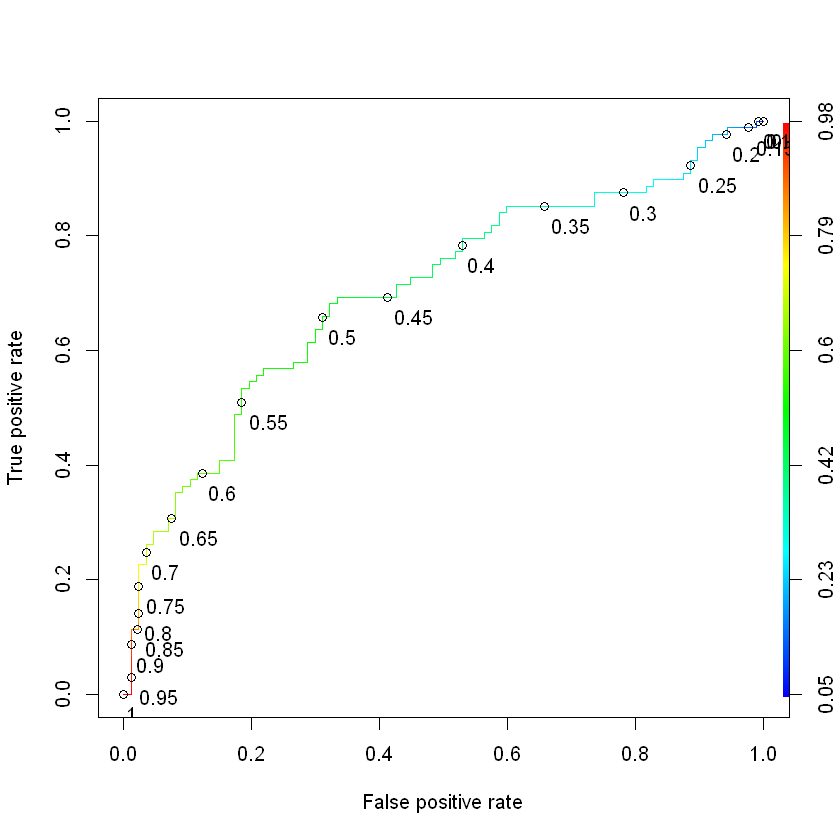

In [20]:
ROCRperf = performance(ROCRpred, 'tpr', 'fpr')

#plot(ROCRperf, colorize=T)
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.05), text.adj=c(-0.2,1.7))

**At roughly which logistic regression cutoff does the model achieve a true positive rate of 85% and a false positive rate of 60%?**

Answer: Approx. 0.37.

### Problem 13 - Cross-Validation to Select Parameters
**Which of the following best describes how 10-fold cross-validation works when selecting between 2 different parameter values?**

Answer: 
    
    numFolds = trainControl(method='cv', number=10)

### Problem 14 - Cross-Validation for a CART Model
Set the random seed to 201 (even though you have already done so earlier in the problem). Then use the caret package and the train function to perform 10-fold cross validation with the training data set to select the best cp value for a CART model that predicts the dependent variable "RaisedFedFunds" using the independent variables "PreviousRate," "Streak," "Unemployment," "HomeownershipRate," "DemocraticPres," and "MonthsUntilElection." Select the cp value from a grid consisting of the 50 values 0.001, 0.002, ..., 0.05.

In [21]:
library(caret)
library(e1071)
library(rpart)
library(rpart.plot)

Loading required package: lattice

Loading required package: ggplot2



In [22]:
# Cross-Validation

set.seed(201)

numFolds = trainControl(method='cv', number=10)

cpGrid = expand.grid(.cp=seq(0.001, 0.05, length.out = 50))

train(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + HomeownershipRate + DemocraticPres + MonthsUntilElection,
                       data=train, method='rpart', trControl=numFolds, tuneGrid=cpGrid)

CART 

410 samples
  6 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 369, 369, 369, 370, 368, 369, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.001  0.6265941  0.2526691
  0.002  0.6337979  0.2671836
  0.003  0.6436121  0.2868450
  0.004  0.6436121  0.2868450
  0.005  0.6436121  0.2868450
  0.006  0.6533740  0.3064931
  0.007  0.6533740  0.3064931
  0.008  0.6533740  0.3064931
  0.009  0.6509350  0.3014898
  0.010  0.6484959  0.2965688
  0.011  0.6509959  0.3026313
  0.012  0.6509959  0.3026313
  0.013  0.6509959  0.3026313
  0.014  0.6534350  0.3074360
  0.015  0.6534350  0.3078892
  0.016  0.6534350  0.3078892
  0.017  0.6412398  0.2838340
  0.018  0.6412398  0.2838340
  0.019  0.6315999  0.2651432
  0.020  0.6364779  0.2736764
  0.021  0.6364779  0.2736764
  0.022  0.6340389  0.2686034
  0.023  0.6340389  0.2686034
  0.024  0.6413560  0.2829661
  0.025  0.6413560  0.2829661


**What cp value maximizes the cross-validation accuracy?**

Answer: cp = 0.05.

### Problem 15 - Train CART Model
Build and plot the CART model trained with the parameter identified in Problem 14, again predicting the dependent variable using "PreviousRate", "Streak", "Unemployment", "HomeownershipRate", "DemocraticPres", and "MonthsUntilElection". 

In [23]:
# Classification And Regression Trees (CART) Model
tree = rpart(RaisedFedFunds ~ PreviousRate + Streak + Unemployment + HomeownershipRate + DemocraticPres + MonthsUntilElection,
             data=train, method='class', cp=0.05)

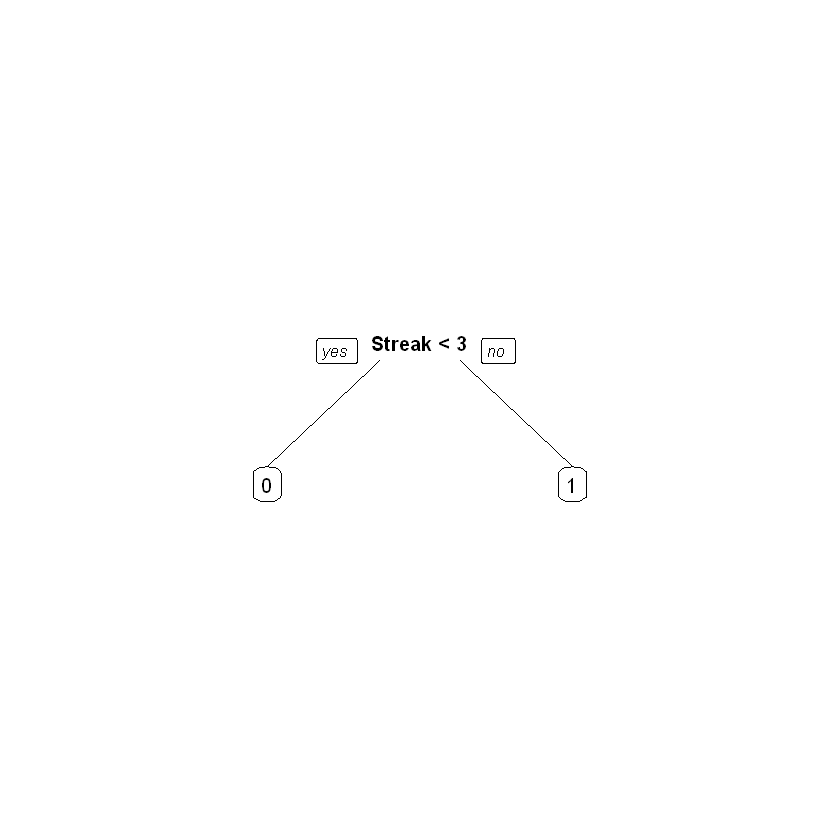

In [24]:
# Plot Tree (rpart.plot)
prp(tree)

**What variable is used as the first (upper-most) split in the tree?**

Answer: Streak.

### Problem 16 - Predicting Using a CART Model
If you were to use the CART model you created in Problem 15 to answer the question asked of the analyst in Problem 6, **what would you predict for next month?**

Remember: The rate has been lowered for 3 straight months (Streak = -3). The previous month's rate was 1.7%. The unemployment rate is 5.1%. The homeownership rate is 65.3%. The current U.S. president is a Republican and the next election will be held in 18 months.

In [25]:
single = train[1,]
single

,Date,Chairman,PreviousRate,Streak,GDP,Unemployment,CPI,HomeownershipRate,DebtAsPctGDP,DemocraticPres,MonthsUntilElection,RaisedFedFunds
,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<fct>
1,1966-02-01,"Martin, William M.",4.42,4,4201.891,4,31.88,63.5,40.26076,1,33,1


In [26]:
single$Streak = -3
single$PreviousRate = 1.7
single$Unemployment = 5.1
single$HomeownershipRate = 65.3
single$DemocraticPres = 0
single$DemocraticPres = as.factor(single$DemocraticPres)
single$MonthsUntilElection = 18

In [27]:
# Predicting with CART Model
predCVSingle = predict(tree, newdata = single, type='prob')
predCVSingle

,0,1
1,0.6166667,0.3833333


Answer: **38.33%**.

### Problem 17 - Test-Set Accuracy for CART Model
Using the CART model you created in Problem 15, obtain predictions on the test set (using the parameter type="class" with the predict function). Then, create a confusion matrix for the test set.

**What is the accuracy of your CART model?**

In [28]:
# Make Predictions with Cross-Validation Tree
predCV = predict(tree, newdata = test, type='class')

# Confusion Matrix
cmCV = table(test$RaisedFedFunds, predCV)
cmCV

   predCV
     0  1
  0 79  8
  1 52 36

In [29]:
# Compute Cross-Validation Tree Accuracy
accurCV = sum(diag(cmCV))/sum(cmCV)
paste("Accuracy Cross-Validation Tree:", round(accurCV,digits=4))

[1] "Accuracy Cross-Validation Tree: 0.6571"

### Comparison between models

In [30]:
paste("Accuracy Baseline:", round(accurBl,digits=4))

paste("Accuracy Logistic Regression:", round(accurLR,digits=4))

paste("Accuracy Cross-Validation Tree:", round(accurCV,digits=4))

[1] "Accuracy Baseline: 0.5029"

[1] "Accuracy Logistic Regression: 0.6686"

[1] "Accuracy Cross-Validation Tree: 0.6571"